Problem 1, part b

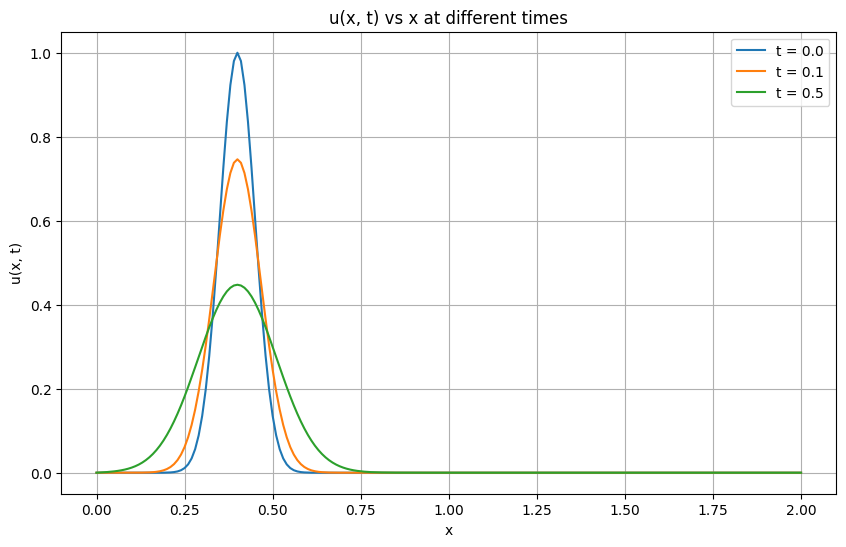

In [4]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.01 
L = 2.0
dx = 0.01
dt = 1e-4
x = np.arange(0, L + dx, dx)
time_points = [0, 0.1, 0.5]

u = np.exp(-200 * (x - 0.4)**2)
u_next = np.zeros_like(u)

u[0], u[-1] = 0, 0

num_steps = int(max(time_points) / dt) + 1
results = {}

for n in range(num_steps):
    t = n * dt
    if t in time_points:
        results[t] = u.copy()
    
    for i in range(1, len(x) - 1):
        u_next[i] = u[i] + (D * dt / dx**2) * (u[i + 1] - 2 * u[i] + u[i - 1])
    
    u_next[0], u_next[-1] = 0, 0
    
    u = u_next.copy()
    t += dt

plt.figure(figsize=(10, 6))
for t, u_t in results.items():
    if u_t is not None:
        plt.plot(x, u_t, label=f"t = {t}")

plt.title("u(x, t) vs x at different times")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

Problem 1 part c

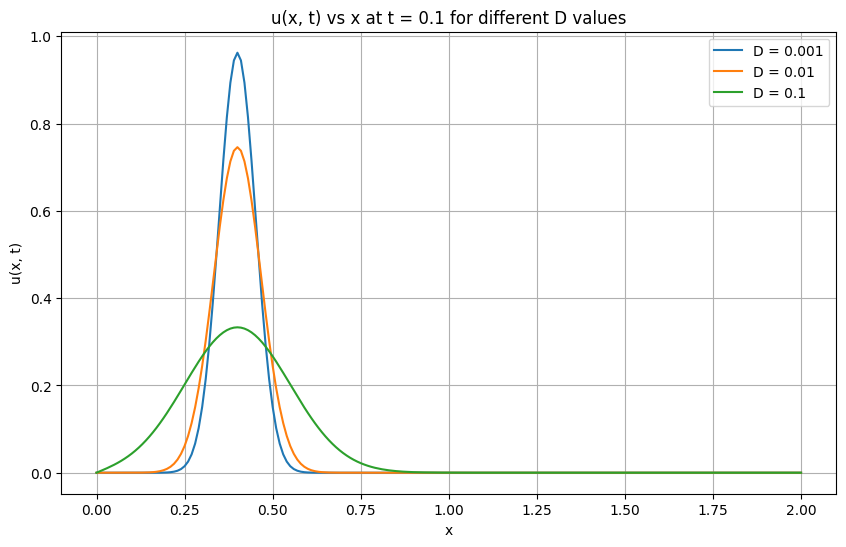

In [5]:
D_values = [0.001, 0.01, 0.1]
time_to_plot = 0.1
results_D = {}

for D in D_values:
    u = np.exp(-200 * (x - 0.4)**2)
    u[0], u[-1] = 0, 0

    num_steps = int(time_to_plot / dt) + 1

    for n in range(num_steps):
        u[1:-1] = u[1:-1] + (D * dt / dx**2) * (u[2:] - 2 * u[1:-1] + u[:-2])

    results_D[D] = u.copy()

plt.figure(figsize=(10, 6))
for D, u_t in results_D.items():
    plt.plot(x, u_t, label=f"D = {D}")

plt.title(f"u(x, t) vs x at t = {time_to_plot} for different D values")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

Problem 2
Part a

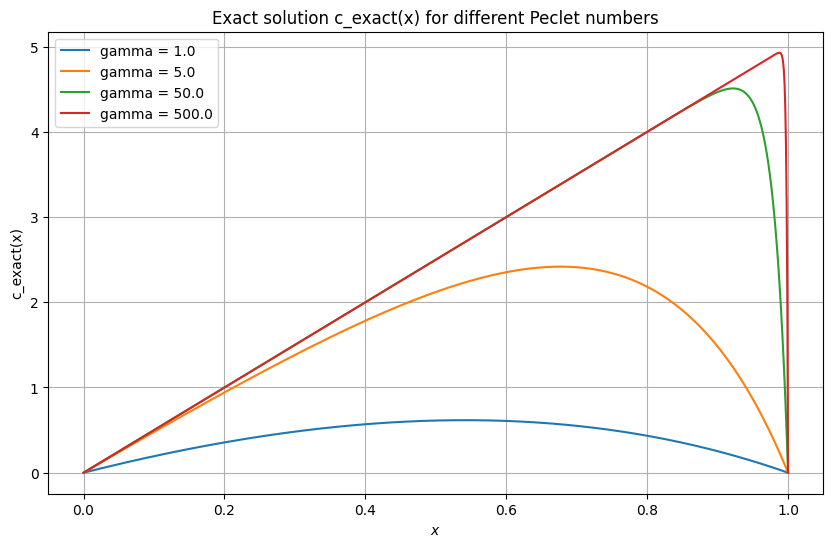

In [8]:
V = 1
# for gamma = V/D = 1, 5, 50, 500 with V = 1
D_values = [1, 0.2, 0.02, 0.002]
x = np.linspace(0, 1, 1000)

def c_exact(x, V, D):
    gamma = V / D
    return (5 / V) * (x - (1 - np.exp(gamma * x)) / (1 - np.exp(gamma)))

plt.figure(figsize=(10, 6))
for D in D_values:
    gamma = V / D
    plt.plot(x, c_exact(x, V, D), label=f"gamma = {gamma}")

plt.title("Exact solution c_exact(x) for different Peclet numbers")
plt.xlabel("$x$")
plt.ylabel("c_exact(x)")
plt.legend()
plt.grid()
plt.show()

Part c

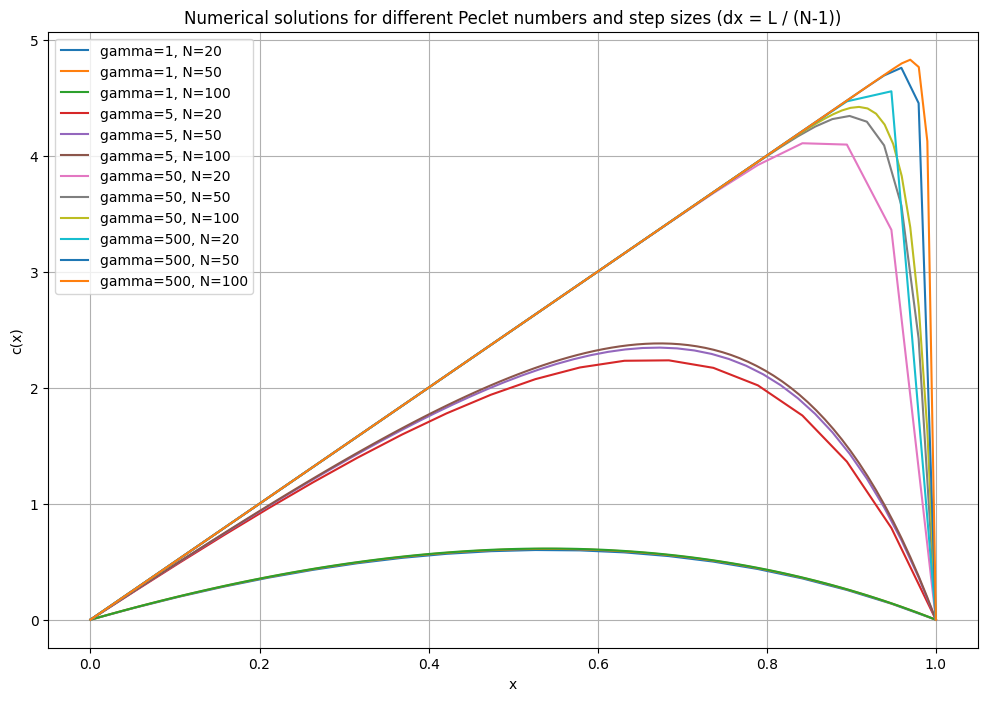

In [13]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

L = 1
V = 1
f = 5 
peclet_numbers = [1, 5, 50, 500]
D_values = [V / gamma for gamma in peclet_numbers]


def solve(V, D, N):
    dx = L / (N-1)
    x = np.linspace(0, L, N)

    main_diag = (2 * D / dx**2 + V / dx) * np.ones(N - 2)
    lower_diag = (-D / dx**2 - V / dx) * np.ones(N - 3)
    upper_diag = (-D / dx**2) * np.ones(N - 3)

    A = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')
    b = f * np.ones(N - 2)
    c_interior = spsolve(A, b)

    c = np.zeros(N)
    c[1:-1] = c_interior
    return x, c

plt.figure(figsize=(12, 8))

for D, gamma in zip(D_values, peclet_numbers):
    for N in [20, 50, 100]: 
        
        x, c = solve(V, D, N)
        plt.plot(x, c, label=f"gamma={gamma}, N={N}")
        
plt.title("Numerical solutions for different Peclet numbers and step sizes (dx = L / (N-1))")
plt.xlabel("x")
plt.ylabel("c(x)")
plt.legend()
plt.grid()
plt.show()
